In [4]:


import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [8]:
##Load the dataset and display the first 10 rows.

df=pd.read_csv("netflix_titles.csv")
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [11]:
##Check the dataset shape and column names

df.shape
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
##Show data types and missing value counts for each column.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [14]:
## missing value counts

df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [17]:
##Find the number of movies vs. TV shows.


df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [ ]:
##Display the most common rating

df['rating'].value_counts().head(1)   ## head(1) uses for top count 

rating
TV-MA    3207
Name: count, dtype: int64

In [22]:
##Find the oldest and most recent release year

int(df['release_year'].min()),int(df['release_year'].max())

(1925, 2021)

In [ ]:
##Count how many titles were added to Netflix each year
import pandas as pd

df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')  ## coerce=If you can’t convert a value to a valid date, don’t throw an error — just turn it into NaT
df['year_added'] = df['date_added'].dt.year
df['year_added'].value_counts().sort_index()


##With coerce → bad values become NaT silently.

##Without coerce → Pandas raises an error if it finds any unconvertible value.

year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64

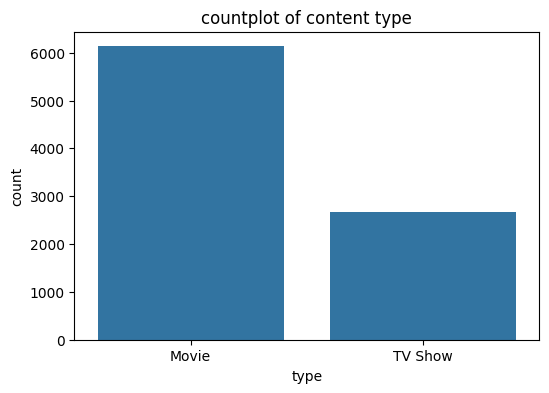

In [31]:
##Plot a countplot of content type (Movies vs. TV Shows).

plt.figure(figsize=(6,4))
sns.countplot(x='type',data=df)
plt.title("countplot of content type")
plt.show()



In [38]:
##Top 10 countries with the most titles

top_countries=df['country'].value_counts().head(10)
top_countries


country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

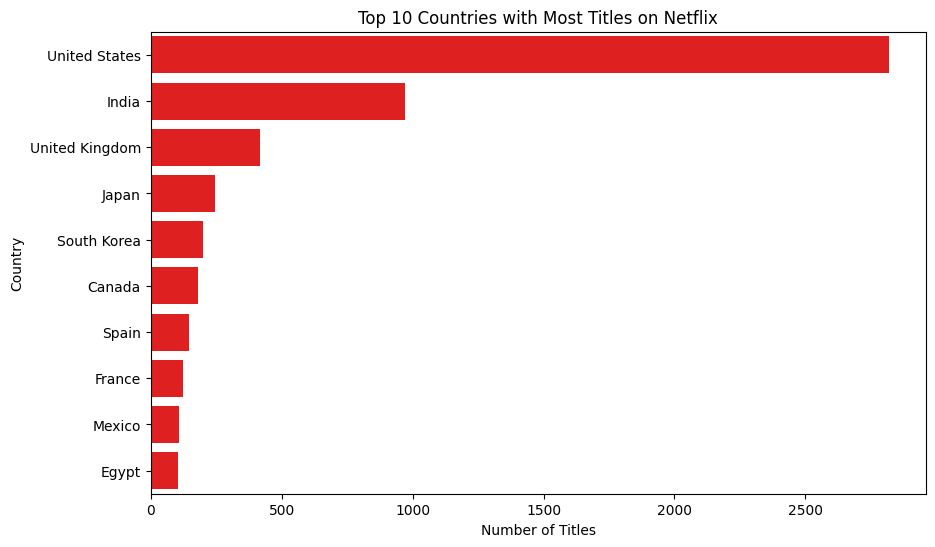

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values,y=top_countries.index,color='red')
plt.title("Top 10 Countries with Most Titles on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

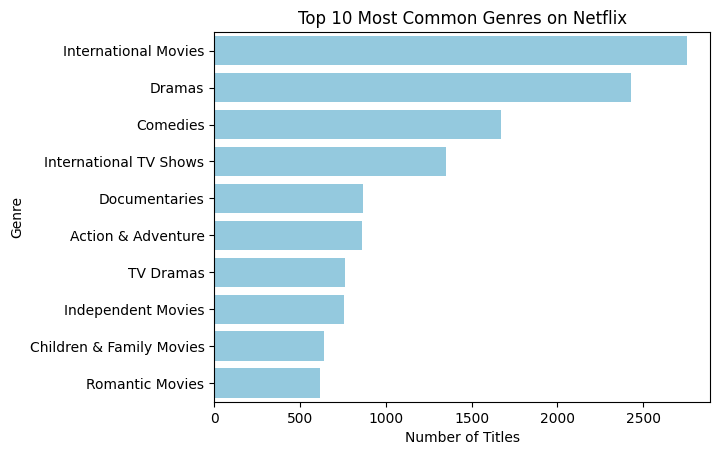

In [44]:
##Plot a bar chart of the most common genres




genres=df['listed_in'].str.split(',').explode().str.strip()

top_genres=genres.value_counts().head(10)
top_genres
sns.barplot(x=top_genres.values,y=top_genres.index,color='skyblue')

plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


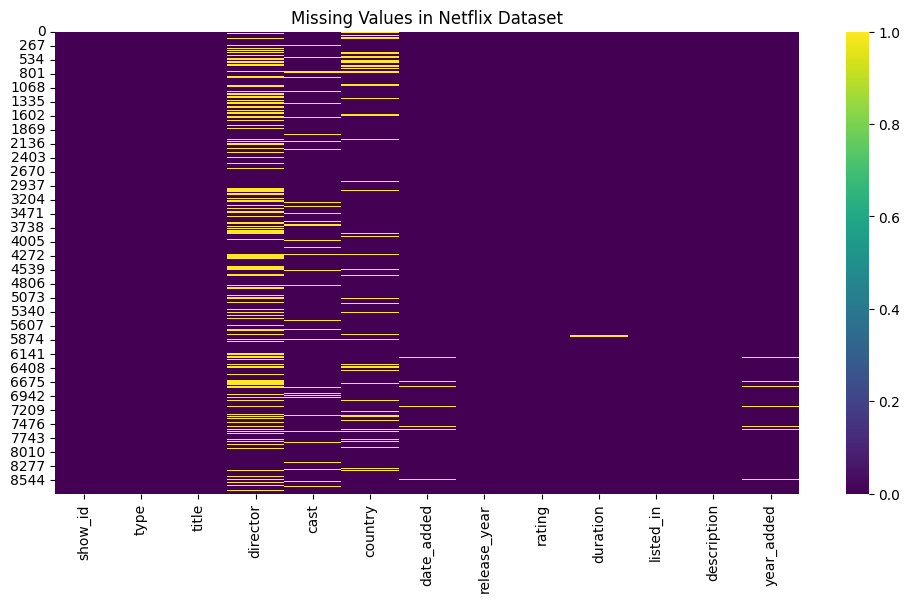

In [54]:
##Use a heatmap to check missing values in the dataset.

plt.figure(figsize=(12,6))

sns.heatmap(df.isnull(),cbar='False',cmap='viridis')
plt.title("Missing Values in Netflix Dataset")
plt.show()

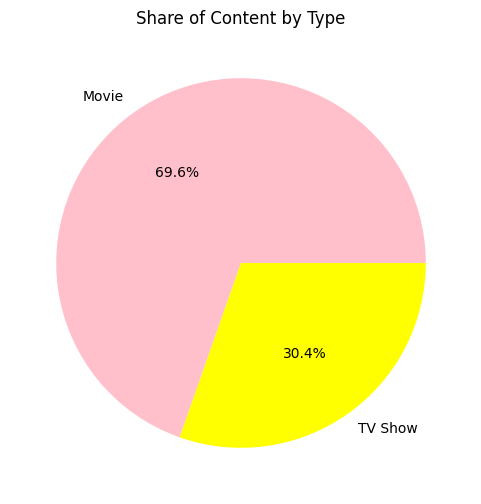

In [52]:
## pie chart of content by type

plt.figure(figsize=(6,6))
df['type'].value_counts().plot.pie(autopct='%1.1f%%',  colors=['pink','yellow'])
plt.title("Share of Content by Type")
plt.ylabel("") 
plt.show()